# Lab 'Afterlife'
### Review of basic concepts to pass the course

### Important: do not delete any blocks
#### But you may add as many as you need.


#### About tasks

This notebook consists of numerous tasks but please make it look like a whole story: a report with your own code, thoughts and conclusions. In some of these tasks you will have to implement some custom functions, in some of them you will be asked to present some plots and describe them. Please try to make your code as short as possible and your answers as clear as possible (in Russian or English).


#### Evaluation

- There are **Questions** in the tasks, don't skip them. If you skip a question, the whole task is considered as skipped.
- When your answer includes some numbers, make sure to provide some code or calculations that prove your results.
- Pay a lot attention to your plots:
    - Are they comprehensible? Shapes, colours, sizes?
    - Are they titled?
    - Are axes labelled?
    - Is legend included?

#### How to submit
- Name your file according to this convention: `2021_afterlife_GroupNumber_Surname_Name.ipynb`, for example 
    - `2021_afterlife_404_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2021_afterlife_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`


#### The Data:
- All the datasets you need are here:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part 1. Basic concepts

**Task 1.1.**

**Q:** What is supervised learning? What is the main goal of supervised learning? What is the difference between classification and regression?

**Your answer here:** Supervised learning - это обучение с учителем. У нас есть объекты и метки (для обучающей выборки). Наша задача - построить алгоритм, апроксимирующий истинную функцию (ground truth), чтобы потом она могла предсказывать метки для других объектов. 

Главная цель - найти эту функцию gt (с какой-то хорошей точностью). 

Типы таргетов бывают 
-classification (метки из КОНЕЧНЫХ множеств: бинарных, мультиклассовых, мультилейбовых)
-regression (метки из непрерывного множества, пример - з/п)


**Task 1.2.**

**Q:** What are objects and labels in classification and regression? Provide at least three examples of classification and regression tasks. For each of these examples suggest a few features that can be used in this tasks.

**Your answer here:**
Объект - набор значений, описываемый признаками (фичами). А лэйбл - то, что мы для каждого объекта хотим узнать. 
1. Бинарная классификация. Хотим узнать, поступит ли человек на определённый факультет, или нет. Наши фичи - его возраст, пол, оценки егэ, наличие олимпиад. Метка: 0, если поступит, 1, если не поступит
2. Мультиклассовая классификация. Хотим определить, будет ясно, пасмурно, дождь, или снег (итого 5 меток). Фичи - температура, погода на день ранее, давление, время года.
3. Мультилейбл классификация. Хотим определить, какими болезнями из списка болен пациент. Фичи - результаты его анализов. Метки - массив из 0 и 1, каждая цифра соответствует такой-то болезни
4. Регрессия. Хотим определить з/п для работника. Фичи - стаж, возраст, вуз, опыт работы

**Task 1.3.**

**Q:** Name as many binary classification quality metrics as you can. Provide a formula for each of them

**Your answer here:**


*   l2 d(x,y) 
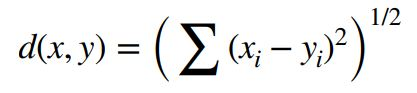
*   евклидова 
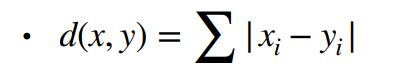
*   lp
  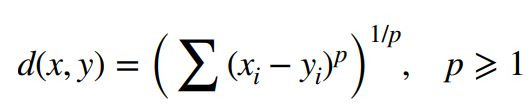




  **Task 1.4.**

**Q:** Calculate all the metrics you mentioned in the task above. Implement them, do not import anything apart from `numpy`.

In [ ]:
predictions = [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1]
ground_truth = [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0]


# Metric Euclidean:
s=0
for x in range(0,len(predictions)):
  s=s+(predictions[x]-ground_truth[x])**2 #квадрат только для модуля!
print('Euclidean gives result: ', s)


# Metric l2:
s=0
for x in range(0,len(predictions)):
  s=s+(predictions[x]-ground_truth[x])**2
s=s**(0.5)
print('l2 gives result: ', s)


# Metric lp:
p=10
s=0
for x in range(0,len(predictions)):
  s=s+(predictions[x]-ground_truth[x])**p
s=s**(1/p)
print('lp (p=10) gives result: ', s)



Euclidean gives result:  5
l2 gives result:  2.23606797749979
lp (p=10) gives result:  1.174618943088019


нет задания номер пять(((((
  

**Task 1.6.**

**Q:** What is ROC-AUC? Present two ways how to calculate it (plot-based and probability based). Implement at least one of this methods:

**Your answer here:** существуют различные метрики, демонстрирующие эффективность алгоритма. ROC-AUC - очень хорошая метрика, замеряет то, насколько плохо алгоритм перемешал верные (TPR=TP/(TP+FN)) и неверные (FPR=FP/(FP+TN)) объекты. Её метрика - измеряет площадь под кривой, зависящей от treshold h, или, что то же самое, вероятность того, что случайно выбранный positive объект оказывается правее случайного negative объекта)


In [ ]:
predictions = [0.8, 0.41, 0.76, 0.6, 0.35, 0.74, 0.54, 0.1, 0.51, 0.68, 0.43, 0.95]
ground_truth = [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0]
positive=[]
negative=[]
for x in range(0,len(ground_truth)) :
  if (ground_truth[x]==1):
    positive.append(predictions[x])
  if (ground_truth[x]==0):
    negative.append(predictions[x])
print('p',positive)
print('n',negative)
s=0
for x in range(0,len(positive)):
  for y in range(0,len(negative)):
    if (positive[x]>negative[y]):
      s=s+1/(len(positive)*len(negative))
print(s)

p [0.8, 0.41, 0.6, 0.35, 0.74, 0.54, 0.68, 0.43]
n [0.76, 0.1, 0.51, 0.95]
0.4375


**Task 1.7.**

**Q:** What are train and test sets? What is the purpose of splitting the data into train and test?

**Your answer here:**
Мы обучаем алгоритм только на части данных (train), а на оставшейся (test) проверяем, насколько хорошие ответы даёт уже обученная модель. Это нужно, чтобы избежать переобучения и проверить результаты своей работы


**Task 1.8.**

**Q:** What is overfitting? How do you spot overfitting? What are general ways to overcome it?


**Your answer here:**

Переобучение - эффект, когда алгоритм, не выискивая общих закономерностей, старается запомнить правильные ответы для всех объекты обучающей выборки

Например, модель может очень точно аппроксимировать нашу gt функцию на каком-то отрезке и из-за этого уходить совершенно в ином направлении на другом. Тогда говорят, что модель обладает "низкой обобщающей способностью" - хорошо справляется только с конкретными данными. 

Чтобы избежать переобучения, надо обучать модель на равномерно и рандомно взятых объектах, а не на объектах, взятых из одной области

Для переобучения решающих деревьев - надо ограничивать их глубину. Или использовать tree pruning

### Part 2. Iris dataset

In [2]:
from sklearn.datasets import load_iris
iris_db = load_iris()
iris_db.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Task 2.1.**

**Q:** What are classes and features in this dataset? For each feature plot a histogram of its distribution. Plot bars for each class with a separate colour.

In [3]:
#dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
print(iris_db.target_names)
print(iris_db.feature_names)
#print(iris_db.DESCR)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Your answer here:** В этом датасете 3 класса (сорта ирисов). 0 - setosa, 1 - versicolor, 2 - virginica. Фичи здесь - размеры (длина и ширина) его двух лепестков.

In [4]:
seplen=iris_db.data[:,0]
sepwid=iris_db.data[:,1]
petlen=iris_db.data[:,2]
petwid=iris_db.data[:,3]
iristype=iris_db.target

listofones = [1] * len(iristype)
mytable = pd.DataFrame({"howmany": listofones,'seplen':seplen,'sepwid':sepwid,'petlen':petlen,'petwid':petwid, 'iris':iristype})

display(mytable)

,howmany,seplen,sepwid,petlen,petwid,iris
0,1,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,1,4.7,3.2,1.3,0.2,0
3,1,4.6,3.1,1.5,0.2,0
4,1,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,1,6.7,3.0,5.2,2.3,2
146,1,6.3,2.5,5.0,1.9,2
147,1,6.5,3.0,5.2,2.0,2
148,1,6.2,3.4,5.4,2.3,2


In [5]:
stats = mytable.groupby(["iris"]).count()
print(stats)

      howmany  seplen  sepwid  petlen  petwid
iris                                         
0          50      50      50      50      50
1          50      50      50      50      50
2          50      50      50      50      50


50-50-50

In [6]:
iris1=mytable[0:50]
#print(iris1)
iris2=mytable[50:100]
#print(iris2)
iris3=mytable[100:150]
#print(iris3)

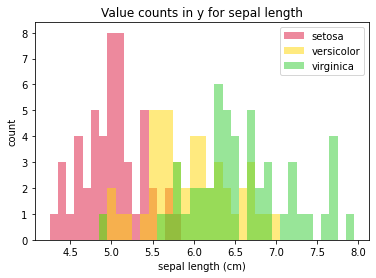

In [7]:
def make_x_y(mytable,name):
    stats = mytable.groupby([name]).count()
    a=stats['howmany'].axes[0]
    b=stats['howmany']
    x=list(a)
    y=list(b)
    return x,y
x,y=make_x_y(iris1,"seplen")
plt.bar(x,y, label="setosa", width=0.1, color = 'crimson', alpha=0.5)
x,y=make_x_y(iris2,"seplen")
plt.bar(x,y, label="versicolor", width=0.1, color = 'gold', alpha=0.5)
x,y=make_x_y(iris3,"seplen")
plt.bar(x,y, label="virginica", width=0.1, color = 'limegreen', alpha=0.5)
#plt.xticks(np.arange(4.2,8,0.1))
plt.title("Value counts in y for sepal length")
plt.legend(loc='upper right')
plt.xlabel("sepal length (cm)")
plt.ylabel("count")
plt.show()

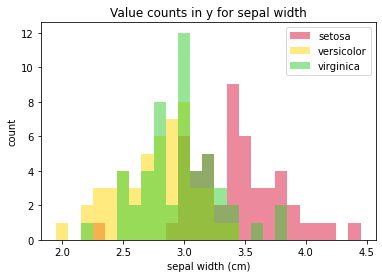

In [8]:
def make_x_y(mytable,name):
    stats = mytable.groupby([name]).count()
    a=stats['howmany'].axes[0]
    b=stats['howmany']
    x=list(a)
    y=list(b)
    return x,y
x,y=make_x_y(iris1,"sepwid")
plt.bar(x,y, label="setosa", width=0.1, color = 'crimson', alpha=0.5)
x,y=make_x_y(iris2,"sepwid")
plt.bar(x,y, label="versicolor", width=0.1, color = 'gold', alpha=0.5)
x,y=make_x_y(iris3,"sepwid")
plt.bar(x,y, label="virginica", width=0.1, color = 'limegreen', alpha=0.5)
#plt.xticks(np.arange(4.2,8,0.1))
plt.title("Value counts in y for sepal width")
plt.legend(loc='upper right')
plt.xlabel("sepal width (cm)")
plt.ylabel("count")
plt.show()

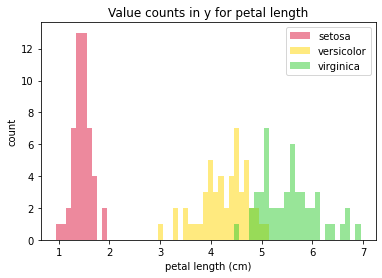

In [9]:
def make_x_y(mytable,name):
    stats = mytable.groupby([name]).count()
    a=stats['howmany'].axes[0]
    b=stats['howmany']
    x=list(a)
    y=list(b)
    return x,y
x,y=make_x_y(iris1,"petlen")
plt.bar(x,y, label="setosa", width=0.1, color = 'crimson', alpha=0.5)
x,y=make_x_y(iris2,"petlen")
plt.bar(x,y, label="versicolor", width=0.1, color = 'gold', alpha=0.5)
x,y=make_x_y(iris3,"petlen")
plt.bar(x,y, label="virginica", width=0.1, color = 'limegreen', alpha=0.5)
#plt.xticks(np.arange(4.2,8,0.1))
plt.title("Value counts in y for petal length")
plt.legend(loc='upper right')
plt.xlabel("petal length (cm)")
plt.ylabel("count")
plt.show()

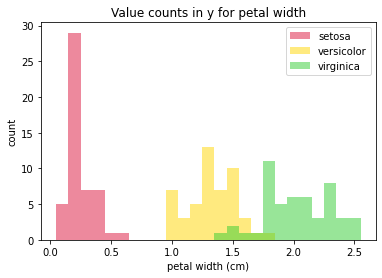

In [10]:
def make_x_y(mytable,name):
    stats = mytable.groupby([name]).count()
    a=stats['howmany'].axes[0]
    b=stats['howmany']
    x=list(a)
    y=list(b)
    return x,y
x,y=make_x_y(iris1,"petwid")
plt.bar(x,y, label="setosa", width=0.1, color = 'crimson', alpha=0.5)
x,y=make_x_y(iris2,"petwid")
plt.bar(x,y, label="versicolor", width=0.1, color = 'gold', alpha=0.5)
x,y=make_x_y(iris3,"petwid")
plt.bar(x,y, label="virginica", width=0.1, color = 'limegreen', alpha=0.5)
#plt.xticks(np.arange(4.2,8,0.1))
plt.title("Value counts in y for petal width")
plt.legend(loc='upper right')
plt.xlabel("petal width (cm)")
plt.ylabel("count")
plt.show()

**Task 2.2.**
Let's consider only two features and two classes: sepal length and sepal width and setosa and versicolor. Plot a 2D scatterplot, each class with its colour and shape.

In [11]:
newtable=mytable.drop(['petlen','petwid'], axis=1)
#display(newtable)
#print(newtable['seplen'][0:50])

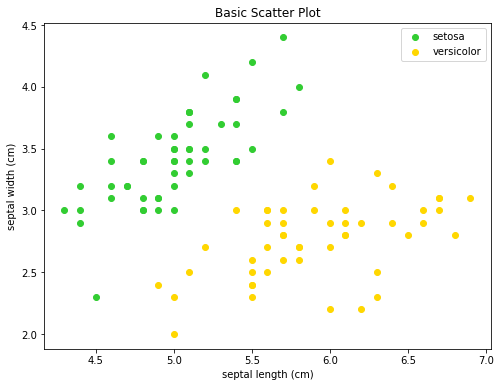

In [12]:
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
z0 = newtable['seplen'][0:50]
z1 = newtable['sepwid'][0:50]
z2 = newtable['seplen'][51:100]
z3 = newtable['sepwid'][51:100]
plt.scatter(z0,z1, c='limegreen',label='setosa')
plt.scatter(z2,z3, c='gold',label='versicolor')
plt.legend(loc="upper right")
plt.xlabel("septal length (cm)")
plt.ylabel("septal width (cm)")
plt.show()

**Task 2.3.**

Using a dataset from 2.2 train 4 decison trees of depths `[1, 2, 3, 4]`.

For each tree examine classification metrics, plot decision boundaries [[tips]]((https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html)).

In [13]:

from sklearn.tree import DecisionTreeClassifier
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.inspection import DecisionBoundaryDisplay

на моменте попытки установки DecisionBoundaryDisplay (нужно было поменять версию питона)  у меня целиком сломался джупитер нотебук, я испугалась, что сломаю что-то ещё, и ушла в гугл коллаб

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [15]:
X=mytable.drop(['howmany','iris','petlen','petwid'], axis=1)
Y = mytable.drop(['howmany','seplen','sepwid','petlen','petwid'], axis=1)
print(X,Y)

     seplen  sepwid
0       5.1     3.5
1       4.9     3.0
2       4.7     3.2
3       4.6     3.1
4       5.0     3.6
..      ...     ...
145     6.7     3.0
146     6.3     2.5
147     6.5     3.0
148     6.2     3.4
149     5.9     3.0

[150 rows x 2 columns]      iris
0       0
1       0
2       0
3       0
4       0
..    ...
145     2
146     2
147     2
148     2
149     2

[150 rows x 1 columns]


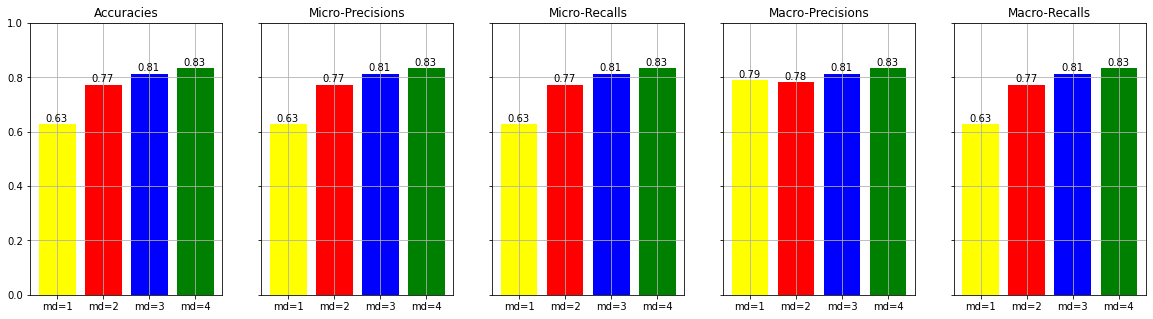

In [16]:
dt_1 = DecisionTreeClassifier(max_depth=1)
dt_2 = DecisionTreeClassifier(max_depth=2)
dt_3 = DecisionTreeClassifier(max_depth=3)
dt_4 = DecisionTreeClassifier(max_depth=4)
clf_predictions=[]
for clf, depth, idx in zip( [dt_1, dt_2, dt_3, dt_4],[1,2,3,4],product([0, 1], [0, 1])):
  clf.fit(X,Y)
  pred = clf.predict(X)
  clf_predictions.append(pred)
 # DecisionBoundaryDisplay.from_estimator(
  #      clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
   # )
    #axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor="k")
    #axarr[idx[0], idx[1]].set_title(tt)
 


accuracies = [accuracy_score(Y, pred) for pred in clf_predictions]
micro_precisions = [precision_score(Y, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls =[recall_score(Y, pred, average="micro", zero_division=1) for pred in clf_predictions]
macro_precisions =[precision_score(Y, pred, average="macro", zero_division=1) for pred in clf_predictions] 
macro_recalls = [recall_score(Y, pred, average="micro", zero_division=1) for pred in clf_predictions] 

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["md=1", "md=2", "md=3", "md=4"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

**Task 2.4.**

- Using a dataset from 2.2 train a linear model and linear SVM.
- Plot decision boundaries for these models and print accuracies.
- What are analytical formulas for these boundaries?
- What is the difference between these two models?

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
X,Y=X[0:100],Y[0:100]
print(X,Y)

    seplen  sepwid
0      5.1     3.5
1      4.9     3.0
2      4.7     3.2
3      4.6     3.1
4      5.0     3.6
..     ...     ...
95     5.7     3.0
96     5.7     2.9
97     6.2     2.9
98     5.1     2.5
99     5.7     2.8

[100 rows x 2 columns]     iris
0      0
1      0
2      0
3      0
4      0
..   ...
95     1
96     1
97     1
98     1
99     1

[100 rows x 1 columns]


In [21]:
from sklearn.linear_model import LinearRegression
model_lr = LogisticRegression()
model_lr.fit(X, Y)
pred_lr = model_lr.predict(X)
acc_lr=accuracy_score(Y, pred_lr)#
print(acc_lr)

model_svm = SVC()
model_svm.fit(X, Y)
pred_svm = model_lr.predict(X)
acc_svm=accuracy_score(Y, pred_svm)
print(acc_svm)

1.0
1.0


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
print(pred_lr)
print(pred_svm)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


В случае линейной модели, на двух фичах разделяющей поверхностью будет прямая, перпендикулярная w, где w - вектор весов. 
Линейные модели стараются провести гипер-плоскость, разделив объекты одного и другого класса.Таких гипер-плоскостей может быть очень много (особенно при мульти-классовой ситуации)


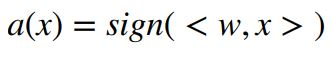

Функция потерь

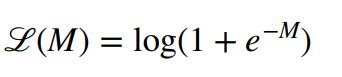

SVM делает то же самое, но выбирает самую оптимальную из плоскостей, максимально разделяющую два класса, стараться максимизировать расстояние до объекта из каждого класса


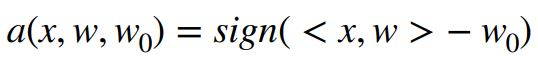

Функция потерь

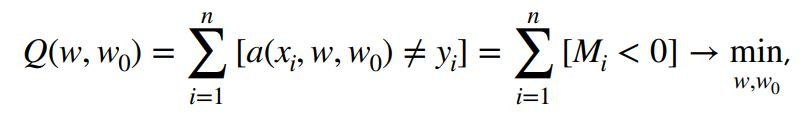

### Part 3. Grid search

**Task 3.1.**

**Q:** What are hyperapameters of a ML-model? What differs them from internal parameters?

**Your answer here:**
Гиперпараметры - параметры модели, которые мы сами задаём в ручную перед запуском алгоритма. А после алгоритм машинного обучения уже сам находит внутренние параметры (решает оптимизационную задачу, минимизируя функцию потерь). В knn, например, есть только гиперпараметры (Number of neighbors k, Kernel function K, Bandwidth h). А в решающих деревьях есть и гиперпараметры (Max depth, критерии сплита), и внутренние (Splits - модель сама их ищет, сама строит дерево).



Now download the breast cancer dataset. Split it into train and test (70% train and 30% test).

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [5]:
bc_db = load_breast_cancer()

In [6]:
X, Y = bc_db.data, bc_db.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

**Task 3.1.** 

Explain what is K-fold cross-validation:

**Your answer here:** Фолды - некоторые дизъюнктные подмножества нашей обучающей выборки. То есть мы случайно разбиваем нашу выборку на k равных частей - фолдов. На каждой итерации мы откладываем один фолд, по остальным обучаем алгоритм и его качество проверяем на отложенном фолде. 

Cross-validation - cv-score - усреднённый скор по каждой итерации (это может быть что угодно, acuracy, presicion, roc-auc).


**Task 3.2.** 

Explain how RF is formed up from decision trees for regression and classification tasks.

**Your answer here:** RF - ансамбль из решающих деревьев. Для каждого объекта он применяет всё множество решающих деревьев, каждое из которых даёт свой вердикт, а после, основываясь на этих вердиктах, выдаёт ответ. В случае классификации - по принципу простого голосования, в случае регрессии - среднее значение. Чтобы лес получился случайным, мы

-обучаем каждое дерево на случайной подвыборке 

-берём для каждой вершины какую-то часть фичей и строим по ним

и т.д.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**Task 3.3.**

- Run a 2D grid search for RF
- Measure training time of each iteration of the search
- Suggest a few ways to make the whole search faster
- Apply one of these faster methods and compare conusmed time and classification quality

In [12]:
from time import time

[3.5762786865234375e-05, 5.245208740234375e-06, 3.814697265625e-06, 3.337860107421875e-06, 3.337860107421875e-06, 3.0994415283203125e-06, 3.0994415283203125e-06, 2.86102294921875e-06, 3.0994415283203125e-06, 3.0994415283203125e-06, 0.00010609626770019531, 1.3828277587890625e-05, 7.152557373046875e-06, 5.9604644775390625e-06, 5.245208740234375e-06, 5.245208740234375e-06, 5.9604644775390625e-06, 6.9141387939453125e-06, 5.9604644775390625e-06, 5.4836273193359375e-06, 5.7220458984375e-06, 5.7220458984375e-06, 5.7220458984375e-06, 5.7220458984375e-06, 5.245208740234375e-06, 4.76837158203125e-06, 5.4836273193359375e-06, 5.7220458984375e-06, 5.0067901611328125e-06, 5.245208740234375e-06, 5.0067901611328125e-06, 5.245208740234375e-06, 4.76837158203125e-06, 4.76837158203125e-06, 5.0067901611328125e-06, 5.4836273193359375e-06, 5.7220458984375e-06, 5.9604644775390625e-06, 5.245208740234375e-06, 5.9604644775390625e-06, 5.4836273193359375e-06, 4.76837158203125e-06, 5.245208740234375e-06, 5.00679016

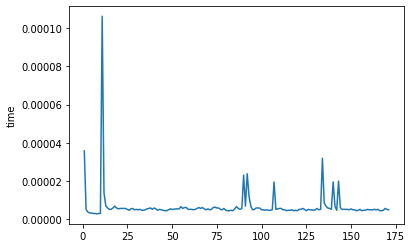

In [ ]:
t=[]
for x in range (1,20):
  for y in range (1,10):
    start = time()
    rf_clf = RandomForestClassifier(n_estimators=x,max_depth=y)
    end = time()
    t.append(end - start)
print(t)
a=len(t)
x=np.linspace(1,a,len(t))
plt.plot(x,t)
plt.ylabel('iteration number')
plt.ylabel('time')
plt.show()


In [10]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")
rf_clf = RandomForestClassifier()
start = time()
n_estim = {
    "n_estimators":  np.arange(1,50),
    "max_features": np.arange(1,31)
}
rf_grid_searcher = GridSearchCV(rf_clf, n_estim, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train, y_train)
end = time()
print("it took {:.3f} seconds".format( end - start))

it took 467.332 seconds


In [ ]:
print('best estimator: ',rf_grid_searcher.best_params_)
print('its score: ', rf_grid_searcher.best_score_)

best estimator:  {'max_features': 1, 'n_estimators': 37}
its score:  0.9673417721518988


Чтобы улучшить время, можно использовать следующие способы:

1.Make sparse grids with fewer number of parameters

2.Choose random subsample from grid points and look for the optimum there

3.Reduce number of folds in cross-validation

4.Make a greedy grid search (use two grid-searchers sequentially)

Буду использовать 1 и 4

In [13]:
warnings.filterwarnings("ignore")
rf_clf = RandomForestClassifier()
start = time()
n_estim = {
    "n_estimators":  np.arange(1,101,5)
}
rf_grid_searcher = GridSearchCV(rf_clf, n_estim, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train, y_train)
bp=rf_grid_searcher.best_params_
n_est=(bp["n_estimators"] )
print(n_est)
rf_gr = {
    "n_estimators":  [n_est],
    "max_features": np.arange(1,31,2)
}
rf_grid_searcher = GridSearchCV(rf_clf, rf_gr, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train, y_train)
end = time()
print("it took {:.3f} seconds".format( end - start))

26
it took 15.596 seconds


In [40]:
print('best estimator: ',rf_grid_searcher.best_params_)
print('its score: ', rf_grid_searcher.best_score_)

best estimator:  {'max_features': 15, 'n_estimators': 11}
its score:  0.9647784810126581


Cкор упал на 1 процент, зато время улучшилось в 20 раз

**Task 3.4.** 

Try to beat a RF with non-linear SVM

In [15]:
from sklearn import svm

In [16]:
clf = svm.NuSVC()
grid = {
    'nu':np.linspace(0,1, num=100),
    "kernel":  ['rbf','sigmoid','poly'],
    'degree':  np.arange(1,10,1),
    'decision_function_shape': ['ovo','ovr']
}
gr_s = GridSearchCV(clf, grid, cv=3, return_train_score=True)
gr_s.fit(X_train, y_train)
print('best estimator: ',gr_s.best_params_)
print('its score: ', gr_s.best_score_)

best estimator:  {'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'rbf', 'nu': 0.12121212121212122}
its score:  0.9523239917976761


In [17]:
gr_s = GridSearchCV(clf, grid, cv=5, return_train_score=True)
gr_s.fit(X_train, y_train)
print('best estimator: ',gr_s.best_params_)
print('its score: ', gr_s.best_score_)

best estimator:  {'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'rbf', 'nu': 0.11111111111111112}
its score:  0.9574050632911393


In [18]:
gr_s = GridSearchCV(clf, grid, cv=4, return_train_score=True)
gr_s.fit(X_train, y_train)
print('best estimator: ',gr_s.best_params_)
print('its score: ', gr_s.best_score_)

best estimator:  {'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'rbf', 'nu': 0.10101010101010102}
its score:  0.9547979797979798


In [19]:
gr_s = GridSearchCV(clf, grid, cv=7, return_train_score=True)
gr_s.fit(X_train, y_train)
print('best estimator: ',gr_s.best_params_)
print('its score: ', gr_s.best_score_)

best estimator:  {'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'rbf', 'nu': 0.12121212121212122}
its score:  0.9573039742212675


**Task 3.5.** 

Tune a voting classifier over SVM and RF, report the results.

In [24]:
print(X)
print(len(X))

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
569


In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, Y, train_size=300, 
                                                    shuffle=True, stratify= None,
                                                    random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size=69, 
                                                    shuffle=True, stratify= None,
                                                    random_state=42)

In [29]:
print(len(X_train),len(X_test),len(X_val))

300 200 69


In [38]:
from sklearn.ensemble import VotingClassifier

clf_a=RandomForestClassifier()
clf_b=svm.NuSVC(kernel='rbf')

clf_a.fit(X_train, y_train)
clf_b.fit(X_train, y_train)

eclf = VotingClassifier(estimators=[('rf', clf_a), ('svm', clf_b)])
a=np.linspace(0,1, num=10)
#print(a)
b=1-a
koef=[]
for i in range(0, 10):
  koef.append([a[i],b[i]])
print(koef)
voting_grid={ 'weights':koef }
voting_grid_searcher = GridSearchCV(eclf, voting_grid, cv=5)
voting_grid_searcher.fit(X_test, y_test)

[[0.0, 1.0], [0.1111111111111111, 0.8888888888888888], [0.2222222222222222, 0.7777777777777778], [0.3333333333333333, 0.6666666666666667], [0.4444444444444444, 0.5555555555555556], [0.5555555555555556, 0.4444444444444444], [0.6666666666666666, 0.33333333333333337], [0.7777777777777777, 0.22222222222222232], [0.8888888888888888, 0.11111111111111116], [1.0, 0.0]]


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('rf',
                                                     RandomForestClassifier()),
                                                    ('svm', NuSVC())]),
             param_grid={'weights': [[0.0, 1.0],
                                     [0.1111111111111111, 0.8888888888888888],
                                     [0.2222222222222222, 0.7777777777777778],
                                     [0.3333333333333333, 0.6666666666666667],
                                     [0.4444444444444444, 0.5555555555555556],
                                     [0.5555555555555556, 0.4444444444444444],
                                     [0.6666666666666666, 0.33333333333333337],
                                     [0.7777777777777777, 0.22222222222222232],
                                     [0.8888888888888888, 0.11111111111111116],
                                     [1.0, 0.0]]})

In [39]:
print('best estimator: ',voting_grid_searcher.best_params_)
print('val_set score: ', voting_grid_searcher.score(X_val, y_val))

best estimator:  {'weights': [0.5555555555555556, 0.4444444444444444]}
val_set score:  0.9565217391304348


### Part 4. Basic text analysis

First task is about binary classification of words: we'll try to separate russian surnames from common russian words.

In [4]:
def read_list_from_file(filename, prefix=""):
    res = []
    with open(prefix + filename, "r") as input_file:
        for line in input_file.readlines():
            res.append(line.strip())
    return res

surnames = np.array(read_list_from_file("russian_surnames.txt"))
all_words = np.array(read_list_from_file("russian.txt"))

In [5]:
surnames_labels = np.ones_like(surnames, dtype=int)
allwords_labels = np.zeros_like(all_words, dtype=int)

X = np.concatenate([surnames, all_words])
y = np.concatenate([surnames_labels, allwords_labels])

In [78]:
print(surnames[0:40])

['аале' 'аалем' 'аалферова' 'аалферовой' 'аалферову' 'ааль' 'аалю' 'ааля'
 'ааман' 'аамана' 'ааманая' 'аамане' 'ааманий' 'ааманим' 'ааманого'
 'ааманой' 'ааманом' 'ааманому' 'ааману' 'ааманую' 'ааманы' 'аандреева'
 'аандреевой' 'аандрееву' 'аарон' 'аарона' 'аароне' 'ааронова' 'аароновой'
 'ааронову' 'аароном' 'аарону' 'аб' 'аб-ганеев' 'аб-ганеева' 'аба'
 'аба-ганеева' 'аба-ганеевой' 'аба-ганееву' 'абабакирова']


In [79]:
print(all_words[0:40])

['-де' '-ка' '-либо' '-нибудь' '-с' '-таки' '-то' 'а' 'а-конто' 'а-ля'
 'а.л.' 'аарона' 'ааронов' 'аб' 'аба' 'абажур' 'абажура' 'абажурам'
 'абажурами' 'абажурах' 'абажуре' 'абажурная' 'абажурного' 'абажурное'
 'абажурной' 'абажурном' 'абажурному' 'абажурною' 'абажурную' 'абажурные'
 'абажурный' 'абажурным' 'абажурными' 'абажурных' 'абажуров'
 'абажуродержателе' 'абажуродержателей' 'абажуродержателем'
 'абажуродержатели' 'абажуродержатель']


In [80]:
print(X)

['аале' 'аалем' 'аалферова' ... 'посмурневши' 'посмурневшие'
 'посмурневший']


In [81]:
print(y)

[1 1 1 ... 0 0 0]


**Task 4.1.** 

We are going to use syllables as features. Why this idea can be reasonable?

**Your answer here:** Задача - по слову понять, к какой категории оно относится. Наш объект классификации - слово. Какие признаки могут быть у слова? Длина, буквы (в него входящие), их последовательность. Но длина особо ничего не говорит, объект лучше воспринимать как последовательность символов. Основной смысл - в них. Итак, весьма логично изучать сочетания букв


**Task 4.2.** 

Implement a simple tokenizer:

In [6]:
def tokenize_word(word, token_len=3):
    ''' Function that splits word into sequence of tokens
    Args:
        word (string): input word
        token_len (int): length of each token
    Returns:
        list(str): list of tokens 
    '''
    tokens_list = []
    m=len(word)
    i=0
    while (i<m-token_len+1) :
      tokens_list.append(word[i:i+token_len])
      i=i+1
 #   print(tokens_list)
    
    return tokens_list

assert tokenize_word("cybersnatch") == ['cyb', 'ybe', 'ber', 'ers', 'rsn', 'sna', 'nat', 'atc', 'tch'], "smth's wrong"
print("tokenize_word: seems legit")

tokenize_word: seems legit


**Task 4.3.** Feature extraction:

- Apply tokenizer to each word to split it into 3-char syllables
- Map list of tokens to a vector with CountVectorizer
- Map list of tokens to a vector with HashingVectorizer
- Train Linear Model and RF on each of these datasets (don't forget to split (X,y) into train and test)
- Report the results (training time and f1): which model is better and why?

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

In [8]:
X_tokenized=[tokenize_word(x) for x in X]

In [85]:
print(X_tokenized[0:40])

[['аал', 'але'], ['аал', 'але', 'лем'], ['аал', 'алф', 'лфе', 'фер', 'еро', 'ров', 'ова'], ['аал', 'алф', 'лфе', 'фер', 'еро', 'ров', 'ово', 'вой'], ['аал', 'алф', 'лфе', 'фер', 'еро', 'ров', 'ову'], ['аал', 'аль'], ['аал', 'алю'], ['аал', 'аля'], ['аам', 'ама', 'ман'], ['аам', 'ама', 'ман', 'ана'], ['аам', 'ама', 'ман', 'ана', 'ная'], ['аам', 'ама', 'ман', 'ане'], ['аам', 'ама', 'ман', 'ани', 'ний'], ['аам', 'ама', 'ман', 'ани', 'ним'], ['аам', 'ама', 'ман', 'ано', 'ног', 'ого'], ['аам', 'ама', 'ман', 'ано', 'ной'], ['аам', 'ама', 'ман', 'ано', 'ном'], ['аам', 'ама', 'ман', 'ано', 'ном', 'ому'], ['аам', 'ама', 'ман', 'ану'], ['аам', 'ама', 'ман', 'ану', 'ную'], ['аам', 'ама', 'ман', 'аны'], ['аан', 'анд', 'ндр', 'дре', 'рее', 'еев', 'ева'], ['аан', 'анд', 'ндр', 'дре', 'рее', 'еев', 'ево', 'вой'], ['аан', 'анд', 'ндр', 'дре', 'рее', 'еев', 'еву'], ['аар', 'аро', 'рон'], ['аар', 'аро', 'рон', 'она'], ['аар', 'аро', 'рон', 'оне'], ['аар', 'аро', 'рон', 'оно', 'нов', 'ова'], ['аар', 'аро

In [9]:
list_of_tokens=[]
for x in X_tokenized:
  a=''
  for m in x:
    a=a+' '+m
  list_of_tokens.append(a)

In [10]:
print(list_of_tokens[0:40])

[' аал але', ' аал але лем', ' аал алф лфе фер еро ров ова', ' аал алф лфе фер еро ров ово вой', ' аал алф лфе фер еро ров ову', ' аал аль', ' аал алю', ' аал аля', ' аам ама ман', ' аам ама ман ана', ' аам ама ман ана ная', ' аам ама ман ане', ' аам ама ман ани ний', ' аам ама ман ани ним', ' аам ама ман ано ног ого', ' аам ама ман ано ной', ' аам ама ман ано ном', ' аам ама ман ано ном ому', ' аам ама ман ану', ' аам ама ман ану ную', ' аам ама ман аны', ' аан анд ндр дре рее еев ева', ' аан анд ндр дре рее еев ево вой', ' аан анд ндр дре рее еев еву', ' аар аро рон', ' аар аро рон она', ' аар аро рон оне', ' аар аро рон оно нов ова', ' аар аро рон оно нов ово вой', ' аар аро рон оно нов ову', ' аар аро рон оно ном', ' аар аро рон ону', '', ' аб- б-г -га ган ане нее еев', ' аб- б-г -га ган ане нее еев ева', ' аба', ' аба ба- а-г -га ган ане нее еев ева', ' аба ба- а-г -га ган ане нее еев ево вой', ' аба ба- а-г -га ган ане нее еев еву', ' аба баб аба бак аки кир иро ров ова']


In [11]:
print(len(list_of_tokens))

2409851


 Count Vectorizer

In [41]:
count_vectorizer_c = CountVectorizer()
count_vectorizer_c.fit(list_of_tokens)
list_of_tokens_c=count_vectorizer_c.transform(list_of_tokens)

In [47]:
print(list_of_tokens_c.shape)

(2409851, 15843)


In [14]:
from sklearn.model_selection import train_test_split

In [92]:
len(list_of_tokens)

2409851

In [93]:
X_train, X_test, y_train, y_test = train_test_split(list_of_tokens_c, y, train_size=2000000, random_state=42, stratify=y)

In [94]:
len(y_test)

409851

In [95]:
X_train=X_train[0:100000]
y_train=y_train[0:100000]
X_test=X_test[0:10000]
y_test=y_test[0:10000]

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [97]:
rf_model = RandomForestClassifier(n_estimators=500)

start = time()
rf_model.fit(X_train, y_train)
end = time()

In [98]:
print("rf took {:.3f} seconds".format(end - start))
y_preds_rf = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, rf_model.predict(X_test))
print('f1 for rf: ' ,rf_f1)

rf took 1448.714 seconds
f1 for rf:  0.8911053422598716


In [99]:
lr_model = LogisticRegression()
start = time()
lr_model.fit(X_train, y_train)
end = time()
print("lr took {:.3f} seconds".format(end - start))

lr took 1.592 seconds


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
y_preds_lr =lr_model.predict(X_test)

lr_f1 = f1_score(y_test, lr_model.predict(X_test))
print('f1 for lr: ' ,lr_f1)

f1 for lr:  0.895235479884663


 Hashing Vectorizer

In [12]:
count_vectorizer_h = HashingVectorizer()
count_vectorizer_h.fit(list_of_tokens)
list_of_tokens_h=count_vectorizer_h.transform(list_of_tokens)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(list_of_tokens_h, y, train_size=2000000, random_state=42, stratify=y)

In [38]:
X_train=X_train[0:100000]
y_train=y_train[0:100000]
X_test=X_test[0:10000]
y_test=y_test[0:10000]

In [39]:
rf_model = RandomForestClassifier(n_estimators=500)
lr_model = LogisticRegression()

start = time()
rf_model.fit(X_train, y_train)

end = time()
print("rf took {:.3f} seconds".format(end - start))
y_preds_rf = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, rf_model.predict(X_test))
print('f1 for rf: ' ,rf_f1)

rf took 417.186 seconds
f1 for rf:  0.5757575757575758


In [29]:
start = time()
lr_model.fit(X_train, y_train)
end = time()
print("lr took {:.3f} seconds".format(end - start))
y_preds_lr =lr_model.predict(X_test)
lr_f1 = f1_score(y_test, lr_model.predict(X_test))
print('f1 for lr: ' ,lr_f1)

lr took 12.175 seconds
f1 for lr:  0.5396825396825397


Для Count Vectorizer хороший результат, для Hashing Vectorizer очень плохой.


### Part 5. Clustering

**Task 5.1.** 

What is clustering? What is the difference between clustering and multiclass classification?

**Your answer here:**4 Кластеризация - задача обучения без учителя. Для задачи multiclass classification мы заранее знаем метки и хоти их предсказать. Для кластеризации мы не знаем меток, не знаем, что должно получиться, не знаем, на сколько классов (кластеров) должно разбиться множество объектов. "Правильного" ответа здесь нет


**Task 5.2.** 

What is K-means? How it works?

**Your answer here:**
Алгоритм, который разбивает множество на k кластеров (k здесь - гиперпараметр). Сначала мы находим k центроидов - каких-то точек. Вердикт алгоритм будет выдавать исходя из того, к какой центроиде объект ближе (ту метку он и выдаст). Этот алгоритм неплохо справляется с невытяннутыми, плотными и хорошо отделимыми друг от друга кластерами.

**Task 5.3.** Iris + Kmeans

Apply K-means to Iris dataset. Plot clustering result on a 2D plane for each pair of features.

In [62]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [63]:
from sklearn.datasets import load_iris
iris_db = load_iris()
seplen=iris_db.data[:,0]
sepwid=iris_db.data[:,1]
petlen=iris_db.data[:,2]
petwid=iris_db.data[:,3]
iristype=iris_db.target

mytable = pd.DataFrame({'seplen':seplen,'sepwid':sepwid,'petlen':petlen,'petwid':petwid, 'iris':iristype})

display(mytable)

,seplen,sepwid,petlen,petwid,iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [73]:
def get_clusters(feature1,feature2):
  newtable = pd.DataFrame({'feature1':feature1,'feature2':feature2})
#  display(newtable)
  clust_model = KMeans(n_clusters=3).fit(newtable)
  clusters = clust_model.predict(newtable)
  return(clusters)

In [75]:
def get_x_y(massiv1,massiv2,clusters):
  x0=[]
  y0=[]
  x1=[]
  y1=[]
  x2=[]
  y2=[]
  for x in range(0,len(clusters)): 
    if (clusters[x]==0):
      x0.append(massiv1[x])
      y0.append(massiv2[x])
    if (clusters[x]==1):
      x1.append(massiv1[x])
      y1.append(massiv2[x])
    if (clusters[x]==2):
      x2.append(massiv1[x])
      y2.append(massiv2[x])
  return (x0,y0,x1,y1,x2,y2)

seplen sepwid

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


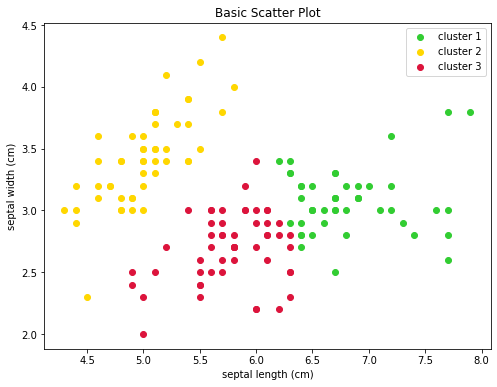

In [76]:
clusters=get_clusters(seplen,sepwid)
x0,y0,x1,y1,x2,y2=get_x_y(seplen,sepwid,clusters)
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
plt.scatter(x0,y0, c='limegreen',label='cluster 1')
plt.scatter(x1,y1, c='gold',label='cluster 2')
plt.scatter(x2,y2, c='crimson',label='cluster 3')
plt.legend(loc="upper right")
plt.xlabel("septal length (cm)")
plt.ylabel("septal width (cm)")
plt.show()

petlen petwid

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


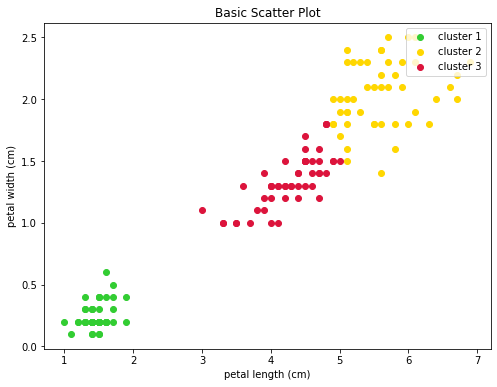

In [77]:
clusters=get_clusters(petlen,petwid)
x0,y0,x1,y1,x2,y2=get_x_y(petlen,petwid,clusters)
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
plt.scatter(x0,y0, c='limegreen',label='cluster 1')
plt.scatter(x1,y1, c='gold',label='cluster 2')
plt.scatter(x2,y2, c='crimson',label='cluster 3')
plt.legend(loc="upper right")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

seplen petlen

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


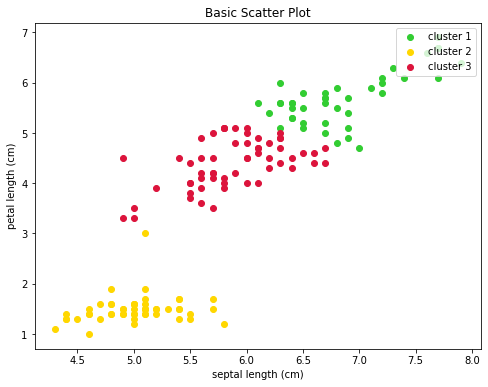

In [78]:
clusters=get_clusters(seplen,petlen)
x0,y0,x1,y1,x2,y2=get_x_y(seplen,petlen,clusters)
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
plt.scatter(x0,y0, c='limegreen',label='cluster 1')
plt.scatter(x1,y1, c='gold',label='cluster 2')
plt.scatter(x2,y2, c='crimson',label='cluster 3')
plt.legend(loc="upper right")
plt.xlabel("septal length (cm)")
plt.ylabel("petal length (cm)")
plt.show()

sepwid petwid

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


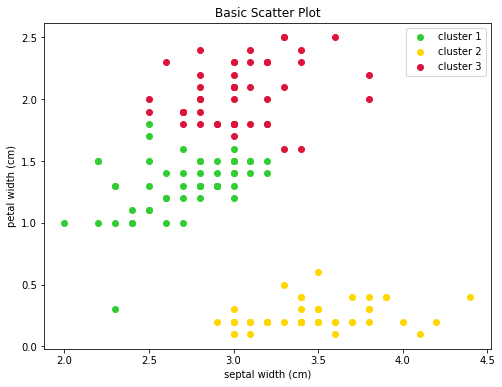

In [79]:
clusters=get_clusters(sepwid,petwid)
x0,y0,x1,y1,x2,y2=get_x_y(sepwid,petwid,clusters)
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
plt.scatter(x0,y0, c='limegreen',label='cluster 1')
plt.scatter(x1,y1, c='gold',label='cluster 2')
plt.scatter(x2,y2, c='crimson',label='cluster 3')
plt.legend(loc="upper right")
plt.xlabel("septal width (cm)")
plt.ylabel("petal width (cm)")
plt.show()

seplen petwid

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


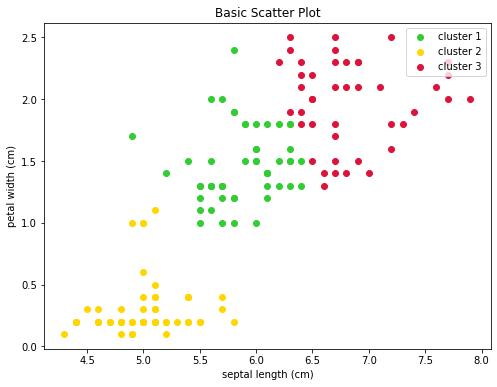

In [80]:
clusters=get_clusters(seplen,petwid)
x0,y0,x1,y1,x2,y2=get_x_y(seplen,petwid,clusters)
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
plt.scatter(x0,y0, c='limegreen',label='cluster 1')
plt.scatter(x1,y1, c='gold',label='cluster 2')
plt.scatter(x2,y2, c='crimson',label='cluster 3')
plt.legend(loc="upper right")
plt.xlabel("septal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

sepwid petlen

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


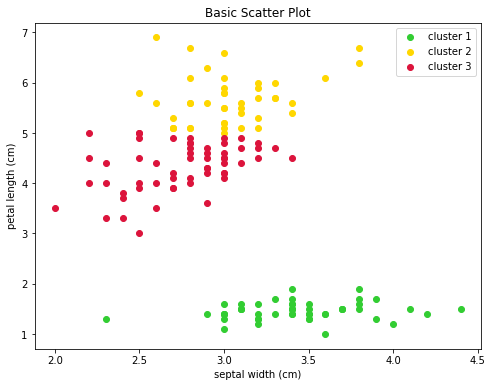

In [81]:
clusters=get_clusters(sepwid,petlen)
x0,y0,x1,y1,x2,y2=get_x_y(sepwid,petlen,clusters)
plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
plt.scatter(x0,y0, c='limegreen',label='cluster 1')
plt.scatter(x1,y1, c='gold',label='cluster 2')
plt.scatter(x2,y2, c='crimson',label='cluster 3')
plt.legend(loc="upper right")
plt.xlabel("septal width (cm)")
plt.ylabel("petal length (cm)")
plt.show()

In [85]:
print(len(x2))

57


**Task 5.4.** PCA

- What is mathematical concept behind PCA
- What can be main purposes of PCA usage?

**Your answer here:**


**Task 5.5.** 

Plot clustering you've obtained above on a 2D plane using PCA.

In [89]:
newtable = pd.DataFrame({'feature1':sepwid,'feature2':petlen})

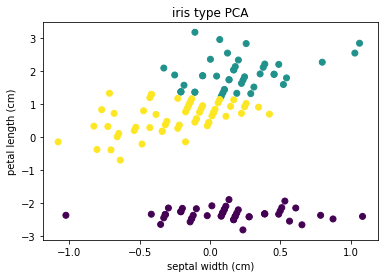

In [96]:
pca_model = PCA(n_components=2)
pca = pca_model.fit_transform(newtable)
plt.xlabel("septal width (cm)")
plt.ylabel("petal length (cm)")

plt.scatter(pca[:, 1], pca[:, 0],c = clusters)
plt.title("iris type PCA")
plt.show()